# Machine Learning Regression Analysis Re-examined: songs
- ### Count of chart weeks vs. total spotify streams
- ### Chart weeks represent Billboard Hot 100 Charts through Dec 31st, 2023
- ### Total spotify streams is the total plays as of Nov 9th, 2023

#### Note limitation in variation of date, especially note for 1989(Taylor's Version) due to recent re-release

### Hypothesis: "As song's total number of Billboard Hot 100 chart weeks increases, the song's total spotify streams will also increase."

## Contents

### 01. Import libraries and data
### 02. Data cleaning 
### 03.Data prep for regression analysis
#### song count of chart weeks vs. song total spotify streams
### 04. Regression analysis 
### 05. Performance improvement after removing outliers

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Show all graphs within cells

%matplotlib inline

In [3]:
path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
df = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'song_stream_alb_final_4.csv'), index_col = 0)

# 02. Data cleaning

In [5]:
df.head(20)

,song_title,album_title,song_release_date,track,acou,dance,ener,instru,live,loud,...,top_alb_count,top_alb_normal,alb_track_cnt,tvflag,sales_group,tot_streams_group,alb_genre,cluster,cnt_chart_wks,_merge
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,2.0,both
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,3.0,both
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,4.0,both
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,3.0,both
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,2.0,both
5,Shake It Off (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,6,0.012100,0.636,0.808,0.000022,0.3590,-5.693,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,2.0,both
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,7,0.003540,0.670,0.858,0.000013,0.0687,-6.528,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,1.0,both
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,8,0.036200,0.618,0.683,0.000000,0.3050,-6.438,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,3.0,both
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,9,0.043600,0.589,0.674,0.000072,0.1120,-7.480,...,1,0.076923,22,True,High first week sales,High total streams,Synth/Dream/Dance pop,2,3.0,both
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,10,0.001960,0.758,0.691,0.000011,0.0939,-5.798,...,1,0.076923,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,2,1.0,both


In [6]:
df.shape

(282, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 281
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   song_title           282 non-null    object 
 1   album_title          282 non-null    object 
 2   song_release_date    282 non-null    object 
 3   track                282 non-null    int64  
 4   acou                 282 non-null    float64
 5   dance                282 non-null    float64
 6   ener                 282 non-null    float64
 7   instru               282 non-null    float64
 8   live                 282 non-null    float64
 9   loud                 282 non-null    float64
 10  speech               282 non-null    float64
 11  temp                 282 non-null    float64
 12  val                  282 non-null    float64
 13  pop                  282 non-null    int64  
 14  dur                  282 non-null    int64  
 15  album_id             282 non-null    object 


### Data types

In [8]:
# Convert total streams to float

df['tot_streams'] = df['tot_streams'].astype(float)

In [9]:
df['tot_streams'].dtype

dtype('float64')

### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# None found

song_title             0
album_title            0
song_release_date      0
track                  0
acou                   0
dance                  0
ener                   0
instru                 0
live                   0
loud                   0
speech                 0
temp                   0
val                    0
pop                    0
dur                    0
album_id               0
song_id                0
days                   0
tot_streams            0
last_stream_update     0
streams_n              0
top_song               0
top_song_flag          0
top_s_cnt              0
tv                     0
alb_num                0
album_announce_mo      0
alb_ann_day            0
alb_ann_yr             0
album_announce_date    0
album_release_mo       0
alb_r_day              0
alb_r_yr               0
album_release_date     0
w1_sales               0
top_alb_count          0
top_alb_normal         0
alb_track_cnt          0
tvflag                 0
sales_group            0


### Duplicates

In [11]:
df_dups = df.duplicated()

In [12]:
df_dups.shape # no dups

(282,)

### Extreme values check

C:\Users\leobs\AppData\Local\Temp\ipykernel_19024\3777001775.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tot_streams'], bins=25)


<Axes: xlabel='tot_streams', ylabel='Density'>

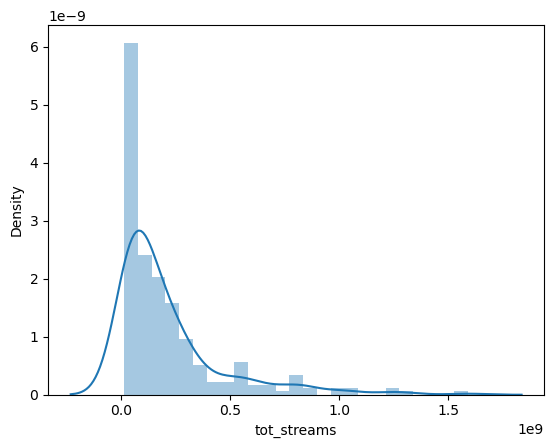

In [13]:
sns.distplot(df['tot_streams'], bins=25)  

Observations: There is a large spread. I imagine some of this is from the most recent album release, 1989(Taylor's Version).

In [14]:
# Check mean, min, median, and max
df['tot_streams'].describe()

count    2.820000e+02
mean     2.116368e+08
std      2.526640e+08
min      1.316050e+07
25%      5.185775e+07
50%      1.190537e+08
75%      2.535259e+08
max      1.591542e+09
Name: tot_streams, dtype: float64

C:\Users\leobs\AppData\Local\Temp\ipykernel_19024\684583601.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt_chart_wks'], bins=25)


<Axes: xlabel='cnt_chart_wks', ylabel='Density'>

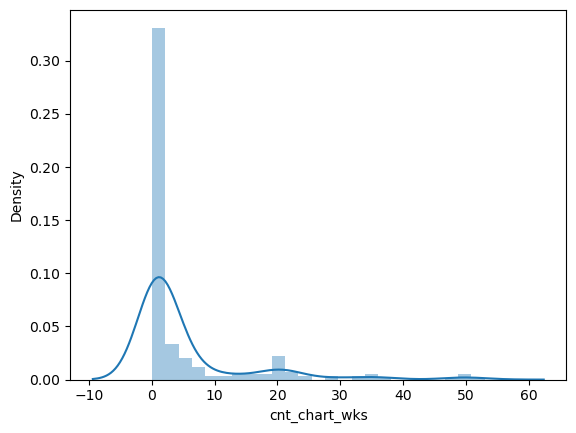

In [15]:
sns.distplot(df['cnt_chart_wks'], bins=25)  

Observations: The high density at chart week 0 is from the 72 songs that never made the billboard hot 100 charts.

In [16]:
# Check mean, min, median, and max

df['cnt_chart_wks'].describe()

count    282.000000
mean       5.127660
std        9.711754
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       53.000000
Name: cnt_chart_wks, dtype: float64

Will proceed with regression analysis, and will consider removing outliers for performance improvement.

# 03. Data prep for regression analysis

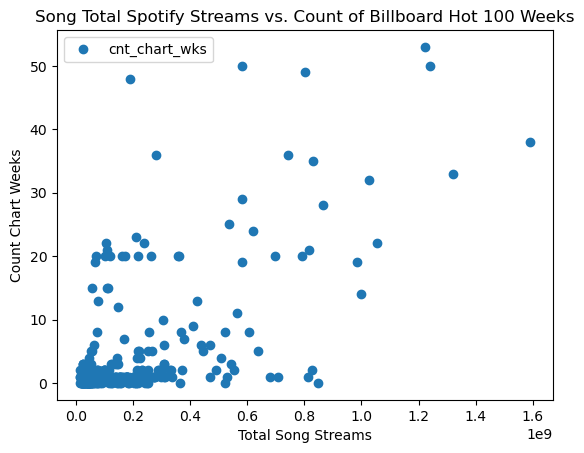

In [17]:
# Create a scatterplot using matplotlib to review variables comparing

df.plot(x = 'tot_streams', y='cnt_chart_wks',style='o') 
plt.title("Song Total Spotify Streams vs. Count of Billboard Hot 100 Weeks")  
plt.xlabel("Total Song Streams")  
plt.ylabel("Count Chart Weeks")  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['tot_streams'].values.reshape(-1,1)
y = df['cnt_chart_wks'].values.reshape(-1,1)

In [19]:
X

array([[3.55217140e+07],
       [4.09580680e+07],
       [4.76871020e+07],
       [3.75451280e+07],
       [3.10085340e+07],
       [2.96847340e+07],
       [2.77274540e+07],
       [2.63530770e+07],
       [5.43373389e+08],
       [2.49358220e+07],
       [1.80539553e+08],
       [2.51623500e+07],
       [2.85016030e+07],
       [2.43355460e+07],
       [2.34763520e+07],
       [3.04165590e+07],
       [5.71650160e+07],
       [5.33947270e+07],
       [6.24985800e+07],
       [3.95904510e+07],
       [7.53424040e+07],
       [1.70757330e+07],
       [1.03893141e+08],
       [7.49802340e+07],
       [1.14295333e+08],
       [6.76285280e+07],
       [6.75000160e+07],
       [6.09471760e+07],
       [6.05240010e+07],
       [3.77251900e+07],
       [1.45745869e+08],
       [7.99137620e+07],
       [3.22559810e+07],
       [4.86323170e+07],
       [4.78382940e+07],
       [6.97918660e+07],
       [3.49140340e+07],
       [2.73723190e+07],
       [5.72508160e+07],
       [5.59972150e+07],


In [20]:
y

array([[ 2.],
       [ 3.],
       [ 4.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 3.],
       [ 8.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 7.],
       [ 1.],
       [ 1.],
       [ 1.],
       [29.],
       [ 7.],
       [53.],
       [ 8.],
       [ 6.],
       [ 8.],
       [ 5.],
       [ 6.],
       [ 9.],
       [ 5.],
       [11.],
       [ 5.],
       [ 5.],
       [ 4.],
       [ 4.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 3.],
       [ 0.],
       [19.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 1.],
      

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression() 

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

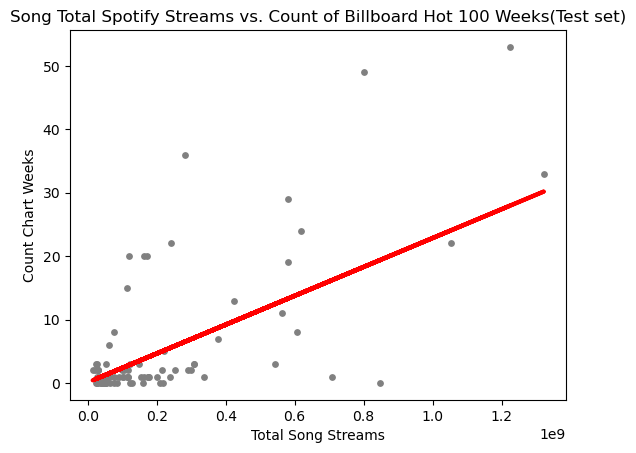

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title("Song Total Spotify Streams vs. Count of Billboard Hot 100 Weeks(Test set)")
plot_test.xlabel('Total Song Streams')
plot_test.ylabel('Count Chart Weeks')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [27]:
# Print the model summary statistics to evaluate model performance

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.27643959e-08]]
Mean squared error:  61.64031652023517
R2 score:  0.45486769626579115


The slope indicates a positive relationship to the degree of 2.33292406e-08

The root mean squareed error estimates how close the regression line is to a set of points. The 64.92 indicates that the model is not very accurate, given the data range of 0 to about 60.

The R2 score tells how well the model explains the variance in the data. The value of 46 indicates not a good fit.

So far, this model is not a good fit.

In [28]:
y_predicted

array([[ 7.13225341],
       [ 2.89603126],
       [ 2.12188201],
       [ 3.00451175],
       [ 0.72029341],
       [14.18017649],
       [ 2.75627911],
       [ 1.23182714],
       [ 0.77965187],
       [ 2.45230187],
       [ 1.82547519],
       [ 1.25955283],
       [ 0.73605905],
       [ 1.05107103],
       [ 3.4785696 ],
       [30.17540584],
       [ 0.94783589],
       [ 3.78719432],
       [ 8.67651611],
       [ 4.03606726],
       [ 4.0471917 ],
       [ 3.99624651],
       [ 4.88090902],
       [ 1.56021129],
       [ 5.81633863],
       [ 6.70530423],
       [ 5.51827238],
       [13.92133777],
       [18.33021528],
       [ 6.47405678],
       [ 4.98338465],
       [12.45680423],
       [ 0.76299232],
       [ 2.43935544],
       [16.18028003],
       [ 1.12819567],
       [ 1.83346707],
       [ 0.68714916],
       [24.07805419],
       [ 7.74682938],
       [ 2.37688502],
       [ 0.75888783],
       [ 1.43840402],
       [ 0.80040544],
       [ 5.13396235],
       [ 1

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.0,7.132253
1,3.0,2.896031
2,1.0,2.121882
3,0.0,3.004512
4,0.0,0.720293
5,24.0,14.180176
6,1.0,2.756279
7,0.0,1.231827
8,2.0,0.779652
9,2.0,2.452302


###The predicted values are far off from the actual y values. 

### Compare how the regression fits the training set

In [30]:
# Predict the X train

y_predicted_train = regression.predict(X_train) 

In [31]:
rmse_predic = mean_squared_error(y_train, y_predicted_train)
r2_predic = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_predic)
print('R2 score: ', r2_predic)

Slope: [[2.27643959e-08]]
Mean squared error:  54.20204427686991
R2 score:  0.36602901601466753


While the mean squared error is smaller in the training set as compared to the test set (which means slightly more accurate), the R2 score is even lower. Once again, this shows a linear model is not a good fit.

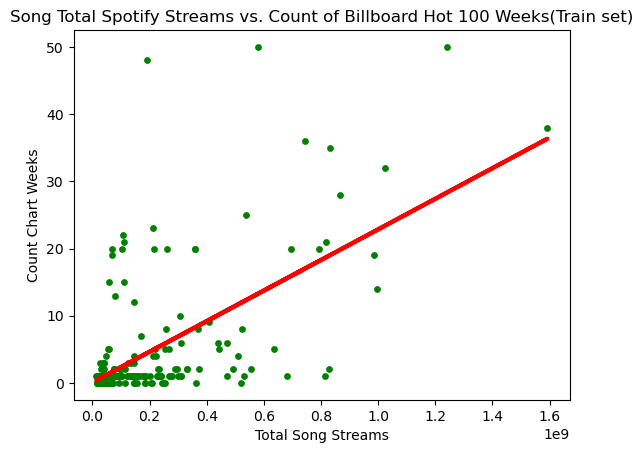

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title("Song Total Spotify Streams vs. Count of Billboard Hot 100 Weeks(Train set)")
plot_test.xlabel('Total Song Streams')
plot_test.ylabel('Count Chart Weeks')
plot_test.show()

# 05. Performance improvement after removing outliers

### As mentioned earlier, this correlation could be thrown off due to:
#### - the recent album, 1989(Taylor's Version)
#### - outliers from songs that are not hits
#### - other outliers

In [34]:
df.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre', 'cluster', 'cnt_chart_wks', '_merge'],
      dtype='object')

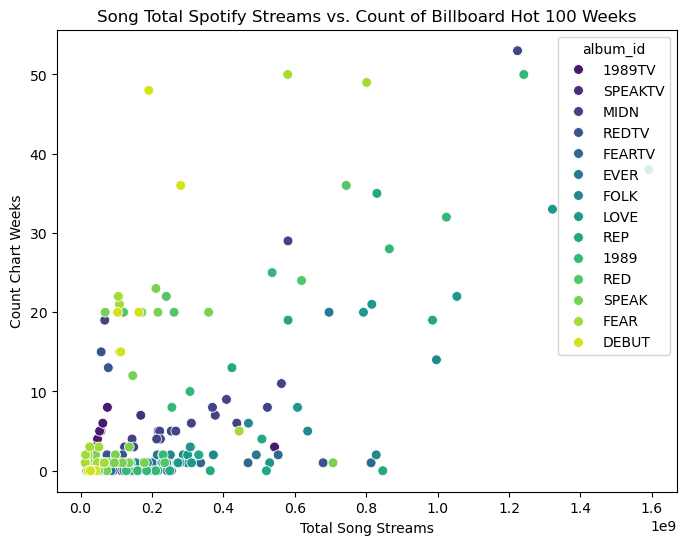

In [35]:
# Add album id onto the scatterplot to check for variable outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'tot_streams', y='cnt_chart_wks', hue='album_id', data=df, palette='viridis', s=50) 
plt.title("Song Total Spotify Streams vs. Count of Billboard Hot 100 Weeks")  
plt.xlabel("Total Song Streams")  
plt.ylabel("Count Chart Weeks")  
plt.show()

Observation: Based on this scatterplot, the album (including the recent release, 1989TV) does not appear to be the reason there are major outliers.

In [36]:
# Review histogram to look for outliers

df['cnt_chart_wks'].value_counts(dropna=False)

cnt_chart_wks
1.0     98
0.0     68
2.0     32
3.0     15
20.0    11
5.0      8
4.0      5
8.0      5
6.0      4
22.0     3
19.0     3
15.0     3
13.0     2
21.0     2
36.0     2
50.0     2
7.0      2
10.0     1
23.0     1
12.0     1
49.0     1
28.0     1
25.0     1
24.0     1
14.0     1
32.0     1
38.0     1
35.0     1
33.0     1
11.0     1
9.0      1
53.0     1
29.0     1
48.0     1
Name: count, dtype: int64

C:\Users\leobs\AppData\Local\Temp\ipykernel_19024\2059906825.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt_chart_wks'], bins=25)


<Axes: xlabel='cnt_chart_wks', ylabel='Density'>

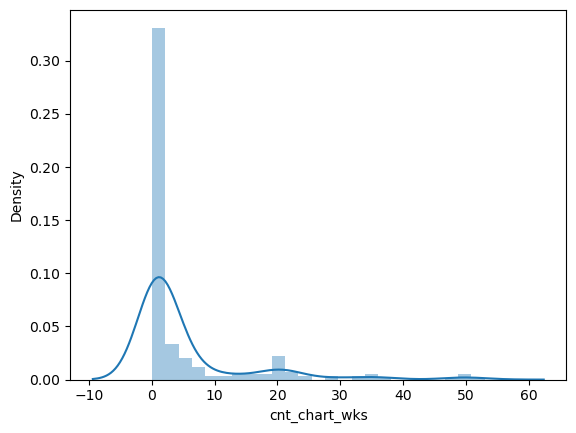

In [37]:
# Review histogram for chart week counts

sns.distplot(df['cnt_chart_wks'], bins=25) 

In [38]:
# Find interquartile ranges to set parameters

q1 = df['cnt_chart_wks'].quantile(0.25)
q3 = df['cnt_chart_wks'].quantile(0.75)
iqr = q3 - q1

# Display the results
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Q1: 1.0
Q3: 3.0
IQR: 2.0


### I'm curious to explore a regression analysis that only includes songs that have made the charts (cnt_chart_wks > 0)

In [39]:
df_top = df[df['cnt_chart_wks'] > 0]

In [40]:
df_top.shape

(214, 45)

C:\Users\leobs\AppData\Local\Temp\ipykernel_19024\2433497167.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_top['cnt_chart_wks'], bins=25)


<Axes: xlabel='cnt_chart_wks', ylabel='Density'>

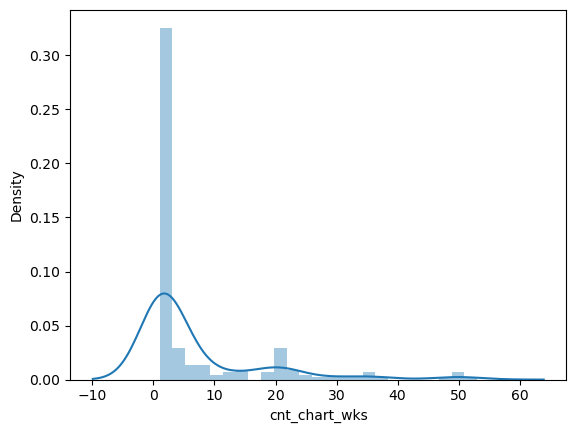

In [41]:
# Review chart counts after removing observations

sns.distplot(df_top['cnt_chart_wks'], bins=25)

There are still too many outliers. Will pause here and proceed to cluster analysis.

## Final observations

While the total spotify streams and count of chart weeks have a .643 correlation coeeficient, regression analysis showed a lack of good fit linear model. Next, I will utilize cluster analysis to identify potential patterns within this relationship.